In [110]:
import pandas as pd

file_path = '../data/Compensation_pre.csv'
data = pd.read_csv(file_path, index_col =0)
data

,지역,학교급,사고자구분,사고자학년,사고자성별,사고시간,사고장소,사고부위,사고형태,사고당시활동,학교급_사고자학년,보상급여
0,전남,고등학교,일반학생,2학년,남,쉬는시간,강당(체육관),골반/엉덩이,그밖의 손상 사고,기타,고등학교 2학년,31900
1,대구,초등학교,일반학생,6학년,여,체육,운동장,두피,그밖의 손상 사고,기타 스포츠 활동,초등학교 6학년,53000
2,경남,고등학교,일반학생,1학년,남,그 밖의 교육활동 시간,기타 교외,기타,그밖의 손상 사고,기타,고등학교 1학년,15027050
3,전북,초등학교,일반학생,5학년,남,쉬는시간,일반(교과)교실,어깨,그밖의 손상 사고,기타,초등학교 5학년,3114900
4,제주,초등학교,일반학생,2학년,남,식사시간(간식 포함),기타 교외,치아,고정된 물체와의 부딪힘,기타,초등학교 2학년,1106500
...,...,...,...,...,...,...,...,...,...,...,...,...
425209,서울,중학교,일반학생,3학년,여,체육,강당(체육관),손가락,고정된 물체와의 부딪힘,피구,중학교 3학년,97200
425210,서울,초등학교,일반학생,5학년,남,체육,강당(체육관),복합부위,사람과의 부딪힘,기타 구기,초등학교 5학년,585950
425211,서울,기타학교,일반학생,3학년,여,현장학습,기타 교외,무릎,넘어짐,"걷기/뛰기, 오르내리기",기타학교 3학년,0
425212,서울,기타학교,일반학생,2학년,여,쉬는시간,계단,어깨,넘어짐,"걷기/뛰기, 오르내리기",기타학교 2학년,284910


In [111]:
import numpy as np

# 1) target 생성
data['target'] = data['학교급'].map(
    lambda x: 1 if x in ['초등학교', '중학교', '고등학교'] else (0 if x in ['특수학교', '유치원'] else np.nan)
)

# 2) 기타학교 제거
data = data.dropna(subset=['target']).copy()
data['target'] = data['target'].astype(int)

print(data['target'].value_counts())

target
1    387972
0     34812
Name: count, dtype: int64


In [113]:
# 3) 로그 변환
data['log_보상급여'] = np.log1p(data['보상급여'])

# 확인
print(data[['보상급여', 'log_보상급여']].describe())

               보상급여       log_보상급여
count  4.227840e+05  422784.000000
mean   4.676172e+05      11.797236
std    5.820941e+06       1.328026
min    0.000000e+00       0.000000
25%    5.840000e+04      10.975088
50%    1.144850e+05      11.648208
75%    2.778000e+05      12.534660
max    1.010000e+09      20.733216


In [114]:
# 각 변수별 타입 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422784 entries, 0 to 425213
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   지역         422784 non-null  object 
 1   학교급        422784 non-null  object 
 2   사고자구분      422784 non-null  object 
 3   사고자학년      422784 non-null  object 
 4   사고자성별      422784 non-null  object 
 5   사고시간       422784 non-null  object 
 6   사고장소       422784 non-null  object 
 7   사고부위       422784 non-null  object 
 8   사고형태       422784 non-null  object 
 9   사고당시활동     422784 non-null  object 
 10  학교급_사고자학년  422784 non-null  object 
 11  보상급여       422784 non-null  int64  
 12  target     422784 non-null  int64  
 13  log_보상급여   422784 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 48.4+ MB


In [115]:
pre = data[['사고자성별', '사고시간', '사고장소', '사고부위', '사고형태', '사고당시활동', 'log_보상급여', 'target']]

In [116]:
pre

,사고자성별,사고시간,사고장소,사고부위,사고형태,사고당시활동,log_보상급여,target
0,남,쉬는시간,강당(체육관),골반/엉덩이,그밖의 손상 사고,기타,10.370393,1
1,여,체육,운동장,두피,그밖의 손상 사고,기타 스포츠 활동,10.878066,1
2,남,그 밖의 교육활동 시간,기타 교외,기타,그밖의 손상 사고,기타,16.525363,1
3,남,쉬는시간,일반(교과)교실,어깨,그밖의 손상 사고,기타,14.951708,1
4,남,식사시간(간식 포함),기타 교외,치아,고정된 물체와의 부딪힘,기타,13.916713,1
...,...,...,...,...,...,...,...,...
425207,여,체육,특별교실(과학실 외),손가락,움직이는 물체와의 부딪힘,피구,11.342149,1
425208,여,쉬는시간,일반(교과)교실,무릎,넘어짐,휴식,13.876513,0
425209,여,체육,강당(체육관),손가락,고정된 물체와의 부딪힘,피구,11.484536,1
425210,남,체육,강당(체육관),복합부위,사람과의 부딪힘,기타 구기,13.280991,1


In [117]:
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import LabelEncoder

# 1️⃣ Label Encoding
cat_cols = ['사고자성별', '사고시간', '사고장소', '사고부위', '사고형태', '사고당시활동']

le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    pre[col] = le.fit_transform(pre[col].astype(str))
    le_dict[col] = le  # 역변환용 저장

# 2️⃣ Feature, Target 구성
X = pre[['사고자성별', '사고시간', '사고장소', '사고부위', '사고형태', '사고당시활동', 'log_보상급여']]
y = pre['target']

# 3️⃣ categorical feature index 설정 (X의 컬럼 순서 기준)
cat_features = [0, 1, 2, 3, 4, 5]  # 앞의 6개 컬럼이 범주형

# 4️⃣ SMOTENC 적용
#smote_nc = SMOTENC(
#    categorical_features=cat_features,
#    sampling_strategy=0.5,
#    random_state=42
#)
# X_resampled, y_resampled = smote_nc.fit_resample(X, y)

X_resampled, y_resampled = X, y

# 5️⃣ 결과 확인
print(y_resampled.value_counts())


target
1    387972
0     34812
Name: count, dtype: int64


In [118]:
for col in cat_cols:
    X_resampled[col] = X_resampled[col].astype('category')

X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422784 entries, 0 to 425213
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   사고자성별     422784 non-null  category
 1   사고시간      422784 non-null  category
 2   사고장소      422784 non-null  category
 3   사고부위      422784 non-null  category
 4   사고형태      422784 non-null  category
 5   사고당시활동    422784 non-null  category
 6   log_보상급여  422784 non-null  float64 
dtypes: category(6), float64(1)
memory usage: 8.9 MB


In [119]:
from pycaret.classification import *

clf = setup(
    data= X_resampled,
    target = y_resampled,
    session_id = 42,
    fold = 5,
    use_gpu = True,
    categorical_features = ['사고자성별', '사고시간', '사고장소', '사고부위', '사고형태', '사고당시활동'],
    numeric_features = ['log_보상급여'],
)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(422784, 8)"
4,Transformed data shape,"(422784, 8)"
5,Transformed train set shape,"(295948, 8)"
6,Transformed test set shape,"(126836, 8)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

In [120]:
best_models = compare_models(sort = 'AUC', n_select = 1, fold = 5, cross_validation = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9598,0.9629,0.9887,0.9682,0.9783,0.7020,0.7094,0.4840
lightgbm,Light Gradient Boosting Machine,0.9591,0.9612,0.9895,0.9668,0.9780,0.6929,0.7022,0.9500
catboost,CatBoost Classifier,0.9586,0.9574,0.9907,0.9650,0.9777,0.6830,0.6953,3.5140
gbc,Gradient Boosting Classifier,0.9507,0.9445,0.9924,0.9556,0.9736,0.5944,0.6212,13.3380
rf,Random Forest Classifier,0.9531,0.9420,0.9850,0.9646,0.9747,0.6522,0.6590,1.1940
ada,Ada Boost Classifier,0.9416,0.9326,0.9877,0.9506,0.9688,0.5181,0.5424,3.8940
et,Extra Trees Classifier,0.9472,0.9262,0.9816,0.9616,0.9715,0.6089,0.6152,0.8640
knn,K Neighbors Classifier,0.9419,0.8687,0.9815,0.9564,0.9688,0.5569,0.5665,3.5600
qda,Quadratic Discriminant Analysis,0.9235,0.8027,0.9930,0.9286,0.9597,0.2188,0.2878,0.4100
nb,Naive Bayes,0.9231,0.7979,0.9938,0.9275,0.9595,0.2014,0.2750,0.3120


In [121]:
gbc_model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9513,0.9458,0.9923,0.9562,0.9739,0.6013,0.6269
1,0.9506,0.9419,0.9924,0.9555,0.9736,0.5932,0.6202
2,0.9507,0.9456,0.9926,0.9554,0.9736,0.5932,0.6208
3,0.9509,0.9447,0.9929,0.9553,0.9738,0.5941,0.6225
4,0.9500,0.9445,0.9917,0.9555,0.9733,0.5900,0.6156
Mean,0.9507,0.9445,0.9924,0.9556,0.9736,0.5944,0.6212
Std,0.0004,0.0014,0.0004,0.0003,0.0002,0.0037,0.0037


In [122]:
tuned_gbcboost = tune_model(
    gbc_model,
    optimize = 'AUC',
    choose_better = True,
    n_iter = 30
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9585,0.9607,0.9875,0.9679,0.9776,0.6938,0.7004
1,0.9577,0.9594,0.9874,0.9671,0.9772,0.6867,0.6938
2,0.9594,0.9610,0.9873,0.9690,0.9781,0.7030,0.7088
3,0.9589,0.9586,0.9869,0.9688,0.9778,0.6992,0.7048
4,0.9586,0.9593,0.9876,0.9679,0.9776,0.6940,0.7008
Mean,0.9586,0.9598,0.9874,0.9681,0.9777,0.6954,0.7017
Std,0.0006,0.0009,0.0002,0.0007,0.0003,0.0055,0.0050


Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [124]:
tuned_gbcboost.feature_importances_

array([0.01300289, 0.32562825, 0.15486041, 0.10240164, 0.0648732 ,
       0.11216637, 0.22706725])

In [125]:
tuned_gbcboost

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.001, min_samples_leaf=5,
                           min_samples_split=10, min_weight_fraction_leaf=0.0,
                           n_estimators=290, n_iter_no_change=None,
                           random_state=42, subsample=0.25, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [126]:
from pycaret.classification import get_config

X_train = get_config('X_train')
y_train = get_config('y_train')
X_test = get_config('X_test')
y_test = get_config('y_test')

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
# 파라미터 직접 조정(시간 자원 문제)

gbc = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.001, min_samples_leaf=5,
                           min_samples_split=10, min_weight_fraction_leaf=0.0,
                           n_estimators=290, n_iter_no_change=None,
                           random_state=42, subsample=0.25, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_train)[:, 1]

In [129]:
from sklearn.metrics import accuracy_score, roc_auc_score

# AUC (이진분류일 때)
train_auc = roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])
test_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

print(f"Train AUC: {train_auc:.4f}, Test AUC: {test_auc:.4f}")

Train AUC: 0.8718, Test AUC: 0.8720


In [130]:
from rulefit import RuleFit
gbc = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.001, min_samples_leaf=5,
                           min_samples_split=10, min_weight_fraction_leaf=0.0,
                           n_estimators=290, n_iter_no_change=None,
                           random_state=42, subsample=0.25, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

rulefit = RuleFit(tree_generator = gbc, rfmode='classification')

In [131]:
rulefit.fit(X_train.values, y_train, feature_names = X_train.columns)

RuleFit(Cs=None, cv=3, exp_rand_tree_size=True, lin_standardise=True,
        lin_trim_quantile=0.025, max_rules=2000, memory_par=0.01,
        model_type='rl', random_state=None, rfmode='classification',
        sample_fract='default',
        tree_generator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='log_loss', max_depth=8,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=8,
                                                  min_impurity_decrease=0.001,
                                                  min_samples_leaf=5,
                                                  min_samples_split=10,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=549,
                                                  n_iter_no_change=None,
                                                  random_state=548,
                                                  subsample=0.25, tol=0.0001,
                                                  validation_fraction=0.1,
                                                  verbose=0, warm_start=False),
        tree_size=4)

In [132]:
# 규칙별 영향력 확인
rules = rulefit.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)

In [133]:
rules

,rule,type,coef,support,importance
1,사고시간,linear,0.006992,1.000000,0.058226
4,사고형태,linear,-0.082871,1.000000,0.457362
5,사고당시활동,linear,0.003758,1.000000,0.082184
2,사고장소,linear,0.009872,1.000000,0.155564
3,사고부위,linear,0.055186,1.000000,0.346880
...,...,...,...,...,...
202,사고당시활동 > 5.5 & 사고시간 <= 6.5 & 사고형태 > 16.5 & 사고시...,rule,-1.867891,0.000176,0.024758
755,사고장소 <= 0.5 & 사고시간 > 0.5,rule,-0.718672,0.000149,0.008762
49,사고장소 > 36.5 & log_보상급여 > 8.85594654083252 & lo...,rule,-0.393639,0.000122,0.004341
347,사고부위 <= 1.5 & log_보상급여 > 13.531314849853516 & ...,rule,-0.214663,0.000068,0.001765


In [136]:
import pandas as pd
import re

# 🔹 범주 인덱스 → 한글 레이블로 바꾸는 함수
def get_labels_in_range(le, lower=None, upper=None):
    classes = le.classes_
    labels = []
    for idx, label in enumerate(classes):
        if lower is not None and upper is not None:
            if lower <= idx <= upper:
                labels.append(label)
        elif lower is not None:
            if idx >= lower:
                labels.append(label)
        elif upper is not None:
            if idx <= upper:
                labels.append(label)
    return labels

# 🔹 규칙을 한글 레이블로 변환하는 함수
def parse_rule_to_labels_clean(rule, col_encoders):
    conditions = rule.split('&')
    parsed_conditions = []
    for condition in conditions:
        condition = condition.strip()
        match = re.match(r'(.+?)\s*(<=|>=|<|>)\s*(\d+\.?\d*)', condition)
        if match:
            col, op, num = match.groups()
            num = float(num)
            le = col_encoders.get(col.strip())
            if le:
                if op == '<=':
                    labels = get_labels_in_range(le, upper=int(num))
                elif op == '>=':
                    labels = get_labels_in_range(le, lower=int(num))
                elif op == '<':
                    labels = get_labels_in_range(le, upper=int(num)-1)
                elif op == '>':
                    labels = get_labels_in_range(le, lower=int(num)+1)
                parsed_conditions.append(f"{col}: {labels}")
            else:
                parsed_conditions.append(condition)
        else:
            parsed_conditions.append(condition)
    return ' | '.join(parsed_conditions)


# 🔹 Top10 규칙을 기준별로 선정 및 해석하기
def analyze_top10_rules(rules_df, le_dict):
    # coef, support, importance 기준 Top 10 추출
    top10_coef = rules_df.reindex(rules_df.coef.abs().sort_values(ascending=False).index).head(10)
    top10_support = rules_df.sort_values(by='support', ascending=False).head(10)
    top10_importance = rules_df.sort_values(by='importance', ascending=False).head(10)

    # 실제 범주형 레이블로 규칙 해석
    for df in [top10_coef, top10_support, top10_importance]:
        df['parsed_rule'] = df['rule'].apply(lambda x: parse_rule_to_labels_clean(x, le_dict))

    # 결과 반환
    return {
        'top10_coef': top10_coef[['rule', 'parsed_rule', 'coef', 'support', 'importance']],
        'top10_support': top10_support[['rule', 'parsed_rule', 'coef', 'support', 'importance']],
        'top10_importance': top10_importance[['rule', 'parsed_rule', 'coef', 'support', 'importance']]
    }

# 🔹 실행 예시
top_rules = analyze_top10_rules(rules, le_dict)

# coef 기준 Top 5 보기
print("✅ coef 기준 Top 10 규칙")
print(top_rules['top10_coef'])

# support 기준 Top 5 보기
print("\n✅ support 기준 Top 10 규칙")
print(top_rules['top10_support'])

# importance 기준 Top 5 보기
print("\n✅ importance 기준 Top 10 규칙")
print(top_rules['top10_importance'])


✅ coef 기준 Top 10 규칙
                                                   rule  \
1241           사고시간 <= 21.5 & 사고시간 > 16.5 & 사고시간 > 18.5   
217   사고시간 <= 14.5 & 사고당시활동 <= 51.5 & 사고장소 > 0.5 & 사...   
9     사고시간 <= 21.5 & 사고시간 <= 18.5 & 사고시간 > 16.5 & 사고...   
1057  사고부위 <= 6.5 & 사고장소 > 36.5 & 사고시간 > 15.5 & 사고당시...   
1343                         사고시간 > 24.5 & 사고시간 <= 25.5   
1474                     사고당시활동 > 14.5 & 사고당시활동 <= 21.0   
12    사고시간 > 18.5 & 사고당시활동 > 5.5 & 사고당시활동 <= 52.5 & ...   
355             사고시간 <= 6.5 & 사고형태 <= 21.5 & 사고시간 > 5.5   
797                            사고시간 <= 2.5 & 사고시간 > 0.5   
716                      사고당시활동 > 27.5 & 사고당시활동 <= 31.5   

                                            parsed_rule      coef   support  \
1241  사고시간: ['(유치원)특성화활동', '경기출전', '과학', '그 밖의 교육활동 ... -5.482479  0.004352   
217   사고시간: ['(유치원)특성화활동', '경기출전', '과학', '그 밖의 교육활동 ... -5.281266  0.000189   
9     사고시간: ['(유치원)특성화활동', '경기출전', '과학', '그 밖의 교육활동 ... -4.215140  0.003109   
1057  사고부위: ['

In [137]:
# coef = 규칙이 예측에 미치는 영향력(양수면 클래스 1확률 증가, 음수면 클래스 0확률 증가)
top_rules['top10_coef']

,rule,parsed_rule,coef,support,importance
1241,사고시간 <= 21.5 & 사고시간 > 16.5 & 사고시간 > 18.5,"사고시간: ['(유치원)특성화활동', '경기출전', '과학', '그 밖의 교육활동 ...",-5.482479,0.004352,0.360894
217,사고시간 <= 14.5 & 사고당시활동 <= 51.5 & 사고장소 > 0.5 & 사...,"사고시간: ['(유치원)특성화활동', '경기출전', '과학', '그 밖의 교육활동 ...",-5.281266,0.000189,0.072641
9,사고시간 <= 21.5 & 사고시간 <= 18.5 & 사고시간 > 16.5 & 사고...,"사고시간: ['(유치원)특성화활동', '경기출전', '과학', '그 밖의 교육활동 ...",-4.215140,0.003109,0.234651
1057,사고부위 <= 6.5 & 사고장소 > 36.5 & 사고시간 > 15.5 & 사고당시...,"사고부위: ['골반/엉덩이', '귀', '기타', '내장기관', '넓적다리(허벅지)...",-3.715094,0.000203,0.052892
1343,사고시간 > 24.5 & 사고시간 <= 25.5,"사고시간: ['자유놀이활동시간', '자율활동', '진로활동', '체육', '체육대회...",-3.247394,0.008920,0.305340
1474,사고당시활동 > 14.5 & 사고당시활동 <= 21.0,"사고당시활동: ['기타 타겟형 스포츠', '농구', '뉴스포츠(구기)', '뉴스포츠...",2.468281,0.110452,0.773688
12,사고시간 > 18.5 & 사고당시활동 > 5.5 & 사고당시활동 <= 52.5 & ...,"사고시간: ['실외활동(바깥놀이 포함)', '언어활동', '요리활동', '음악, 미...",-2.367828,0.000730,0.063946
355,사고시간 <= 6.5 & 사고형태 <= 21.5 & 사고시간 > 5.5,"사고시간: ['(유치원)특성화활동', '경기출전', '과학', '그 밖의 교육활동 ...",-2.284021,0.006488,0.183371
797,사고시간 <= 2.5 & 사고시간 > 0.5,"사고시간: ['(유치원)특성화활동', '경기출전', '과학'] | 사고시간: ['경...",2.112021,0.018422,0.284008
716,사고당시활동 > 27.5 & 사고당시활동 <= 31.5,"사고당시활동: ['무용(댄스 포함)', '배구', '배드민턴', '복싱, 킥복싱',...",1.979719,0.058064,0.462987


In [139]:
# importance = 모델 전체 성능에서의 규칙 중요도
top_rules['top10_importance']

,rule,parsed_rule,coef,support,importance
1474,사고당시활동 > 14.5 & 사고당시활동 <= 21.0,"사고당시활동: ['기타 타겟형 스포츠', '농구', '뉴스포츠(구기)', '뉴스포츠...",2.468281,0.110452,0.773688
587,사고부위 <= 16.5 & 사고부위 <= 17.5,"사고부위: ['골반/엉덩이', '귀', '기타', '내장기관', '넓적다리(허벅지)...",1.139903,0.540379,0.568090
1375,사고장소 <= 36.5 & 사고시간 <= 16.5 & 사고시간 > 0.5,"사고장소: ['가정', '강·바다·하천', '강당(체육관)', '계단', '공원, ...",1.082328,0.369119,0.522295
127,사고장소 > 26.5 & 사고당시활동 <= 58.5,"사고장소: ['문화유적지', '보건실', '복도', '산림·계곡', '숙박시설/식당...",1.009490,0.513631,0.504557
773,사고형태 > 13.5 & 사고시간 > 0.5,"사고형태: ['베임, 절단', '사람 사이에 끼임·눌림', '사람과의 부딪힘', '...",1.044786,0.310406,0.483380
716,사고당시활동 > 27.5 & 사고당시활동 <= 31.5,"사고당시활동: ['무용(댄스 포함)', '배구', '배드민턴', '복싱, 킥복싱',...",1.979719,0.058064,0.462987
4,사고형태,사고형태,-0.082871,1.000000,0.457362
1163,사고당시활동 <= 38.5 & 사고시간 <= 29.5,"사고당시활동: ['(교통수단 등) 운전, 조작, 탑승 중', '걷기/뛰기, 오르내리...",0.836690,0.533945,0.417380
1241,사고시간 <= 21.5 & 사고시간 > 16.5 & 사고시간 > 18.5,"사고시간: ['(유치원)특성화활동', '경기출전', '과학', '그 밖의 교육활동 ...",-5.482479,0.004352,0.360894
3,사고부위,사고부위,0.055186,1.000000,0.346880


In [140]:
# support = 규칙이 데이터에서 나타내는 비율
top_rules['top10_support']

,rule,parsed_rule,coef,support,importance
1,사고시간,사고시간,0.006992,1.000000,0.058226
4,사고형태,사고형태,-0.082871,1.000000,0.457362
5,사고당시활동,사고당시활동,0.003758,1.000000,0.082184
2,사고장소,사고장소,0.009872,1.000000,0.155564
3,사고부위,사고부위,0.055186,1.000000,0.346880
1311,log_보상급여 > 6.441152572631836,log_보상급여 > 6.441152572631836,-0.049870,0.999500,0.001115
640,log_보상급여 > 6.095431327819824,log_보상급여 > 6.095431327819824,-0.045732,0.999486,0.001036
848,log_보상급여 > 6.923519611358643,log_보상급여 > 6.923519611358643,-0.041687,0.999311,0.001094
1426,log_보상급여 > 6.956364393234253,log_보상급여 > 6.956364393234253,-0.031902,0.999311,0.000837
780,사고형태 <= 24.0,"사고형태: ['1미터 미만의 높이에서 떨어짐', '1미터 이상의 높이에서 떨어짐',...",-0.051829,0.999148,0.001512


In [141]:
# top10_coef DataFrame 가져오기
top10_coef_df = top_rules['top10_coef']

# coef가 양수(+)인 규칙만 추출
top10_coef_positive = top10_coef_df[top10_coef_df['coef'] > 0].reset_index(drop=True)

# coef가 음수(-)인 규칙만 추출
top10_coef_negative = top10_coef_df[top10_coef_df['coef'] < 0].reset_index(drop=True)

In [143]:
# 초중고
top10_coef_positive

,rule,parsed_rule,coef,support,importance
0,사고당시활동 > 14.5 & 사고당시활동 <= 21.0,"사고당시활동: ['기타 타겟형 스포츠', '농구', '뉴스포츠(구기)', '뉴스포츠...",2.468281,0.110452,0.773688
1,사고시간 <= 2.5 & 사고시간 > 0.5,"사고시간: ['(유치원)특성화활동', '경기출전', '과학'] | 사고시간: ['경...",2.112021,0.018422,0.284008
2,사고당시활동 > 27.5 & 사고당시활동 <= 31.5,"사고당시활동: ['무용(댄스 포함)', '배구', '배드민턴', '복싱, 킥복싱',...",1.979719,0.058064,0.462987


In [144]:
# 유치원, 특수학교
top10_coef_negative

,rule,parsed_rule,coef,support,importance
0,사고시간 <= 21.5 & 사고시간 > 16.5 & 사고시간 > 18.5,"사고시간: ['(유치원)특성화활동', '경기출전', '과학', '그 밖의 교육활동 ...",-5.482479,0.004352,0.360894
1,사고시간 <= 14.5 & 사고당시활동 <= 51.5 & 사고장소 > 0.5 & 사...,"사고시간: ['(유치원)특성화활동', '경기출전', '과학', '그 밖의 교육활동 ...",-5.281266,0.000189,0.072641
2,사고시간 <= 21.5 & 사고시간 <= 18.5 & 사고시간 > 16.5 & 사고...,"사고시간: ['(유치원)특성화활동', '경기출전', '과학', '그 밖의 교육활동 ...",-4.215140,0.003109,0.234651
3,사고부위 <= 6.5 & 사고장소 > 36.5 & 사고시간 > 15.5 & 사고당시...,"사고부위: ['골반/엉덩이', '귀', '기타', '내장기관', '넓적다리(허벅지)...",-3.715094,0.000203,0.052892
4,사고시간 > 24.5 & 사고시간 <= 25.5,"사고시간: ['자유놀이활동시간', '자율활동', '진로활동', '체육', '체육대회...",-3.247394,0.008920,0.305340
5,사고시간 > 18.5 & 사고당시활동 > 5.5 & 사고당시활동 <= 52.5 & ...,"사고시간: ['실외활동(바깥놀이 포함)', '언어활동', '요리활동', '음악, 미...",-2.367828,0.000730,0.063946
6,사고시간 <= 6.5 & 사고형태 <= 21.5 & 사고시간 > 5.5,"사고시간: ['(유치원)특성화활동', '경기출전', '과학', '그 밖의 교육활동 ...",-2.284021,0.006488,0.183371


In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import re

def plot_rule_combinations_by_label(rule_str, df, label_col, le_dict):
    import pandas as pd
    import matplotlib.pyplot as plt
    import re

    # 1️⃣ rule 기반 필터링 (보상급여 조건 포함)
    filtered_df, _, _ = analyze_rule_vs_label(
        rule_str=rule_str,
        df=df,
        label_col=label_col,
        le_dict=le_dict,
        verbose=False
    )

    # 2️⃣ rule 내 조건 변수 추출 + 보상급여 조건 파싱
    cols_in_rule = []
    salary_conditions = []
    for cond in rule_str.split('&'):
        cond = cond.strip()
        match = re.match(r'(.+?)\s*(<=|>=|<|>)\s*(\d+\.?\d*)', cond)
        if match:
            col, op, num = match.groups()
            col = col.strip()
            if '보상급여' in col:
                salary_conditions.append((col, op, float(num)))
            else:
                cols_in_rule.append(col)
    cols_in_rule = list(set(cols_in_rule))

    # 3️⃣ 보상급여 조건 해석용 컬럼 생성
    for col, op, num in salary_conditions:
        # 필터링 후의 데이터를 기준으로 값 비교하여 표시용 텍스트 생성
        filtered_df[f'{col}_조건'] = filtered_df[col].apply(
            lambda x: f"{col}: 높음" if eval(f"x {op} {num}") else f"{col}: 낮음"
        )

    # 4️⃣ 범주 decoding 및 조합 컬럼 생성
    for col in cols_in_rule:
        if col in le_dict:
            le = le_dict[col]
            filtered_df[f'{col}_label'] = le.inverse_transform(filtered_df[col])
        else:
            filtered_df[f'{col}_label'] = filtered_df[col].astype(str)

    if not cols_in_rule:
        print(f"⚠️ [SKIP] {rule_str} -> '보상급여' 조건 외 시각화 가능한 변수가 없어 스킵합니다.")
        return

    # 조합 key 생성 (보상급여는 포함하지 않음)
    filtered_df['조합'] = filtered_df[[f'{col}_label' for col in cols_in_rule]].agg('-'.join, axis=1)

    # 5️⃣ crosstab 생성 및 normalize
    cross_tab = pd.crosstab(filtered_df['조합'], filtered_df[label_col], normalize='index')

    # 6️⃣ top3 추출
    top_categories_set = set()
    for bar_cat in cross_tab.index:
        group_row = cross_tab.loc[bar_cat]
        top3 = group_row.sort_values(ascending=False).head(3).index.tolist()
        top_categories_set.update(top3)
    top_categories_list = list(top_categories_set)

    # 7️⃣ 시각화
    ax = cross_tab.plot(kind='barh',
                        stacked=True,
                        figsize=(12, max(6, len(cross_tab)*0.4)),
                        colormap='tab20')

    # Legend 학교급 매핑
    handles, labels = ax.get_legend_handles_labels()
    label_to_handle = dict(zip(labels, handles))
    label_map = {'0': '유치원/특수', '1': '초중고'}
    filtered_handles = [label_to_handle[l] for l in labels if int(l) in top_categories_list]
    filtered_labels_named = [label_map.get(l, l) for l in labels if int(l) in top_categories_list]
    ax.legend(filtered_handles, filtered_labels_named, title='학교급', bbox_to_anchor=(1.05, 1))

    # Annotate
    for idx2, bar_cat in enumerate(cross_tab.index):
        group_row = cross_tab.loc[bar_cat]
        top3 = group_row.sort_values(ascending=False).head(3).index.tolist()
        x_offset = 0
        for cat in cross_tab.columns:
            val = group_row[cat]
            if val > 0.01 and cat in top3:
                ax.text(x_offset + val / 2,
                        idx2,
                        f"{val*100:.1f}%",
                        ha='center', va='center',
                        fontsize=8, color='black')
            x_offset += val

    # 보상급여 조건이 있으면 제목에 간략 표시
    salary_info = ""
    if salary_conditions:
        salary_info = "\n" + ", ".join([f"{col} {op} {num}" for col, op, num in salary_conditions])

    plt.xlabel('Proportion')
    plt.title(f"규칙 적용: {rule_str}{salary_info}\n{', '.join(cols_in_rule)} 조합별 학교급(유치원/특수 vs 초중고) 비율")
    plt.tight_layout()
    plt.show()



def plot_ruleset_combinations_by_label(rules_df, df, label_col, le_dict):
    """
    rules_df: 반드시 'rule' 컬럼 포함 (ex: top5_coef_positive)
    df: 분석 대상 데이터프레임 (ex: pre)
    label_col: 라벨 컬럼명 ('target')
    le_dict: LabelEncoder 딕셔너리
    """
    for idx, row in rules_df.iterrows():
        rule_str = row['rule']
        print(f"\n🩶 [Rule {idx+1}/{len(rules_df)}] {rule_str}")

        # 실행
        plot_rule_combinations_by_label(
            rule_str=rule_str,
            df=df,
            label_col=label_col,
            le_dict=le_dict
        )


In [146]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.fontManager.__init__()

fonts = [f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
print("설치된 나눔폰트:", fonts)

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

설치된 나눔폰트: ['NanumSquare', 'NanumGothicCoding', 'NanumGothic', 'NanumSquare_ac', 'NanumMyeongjo', 'NanumMyeongjo YetHangul', 'NanumSquare', 'NanumGothic Eco', 'NanumGothic Eco', 'NanumSquareRound', 'NanumBarunGothic', 'NanumMyeongjo Eco', 'NanumGothic', 'NanumMyeongjo', 'NanumMyeongjo Eco', 'Nanum Brush Script', 'NanumMyeongjo', 'NanumSquareRound', 'Nanum Pen Script', 'NanumSquare_ac', 'NanumBarunGothic YetHangul', 'NanumBarunGothic', 'NanumGothic', 'NanumSquareRound', 'NanumGothic Eco', 'NanumGothic', 'NanumMyeongjo Eco', 'NanumSquare', 'NanumSquare_ac', 'NanumGothic Eco', 'NanumSquare', 'NanumSquare_ac', 'NanumSquareRound', 'NanumGothicCoding', 'NanumBarunpen', 'NanumMyeongjo Eco', 'NanumBarunGothic', 'NanumBarunpen', 'NanumBarunGothic']



🩶 [Rule 1/3] 사고당시활동 > 14.5 & 사고당시활동 <= 21.0


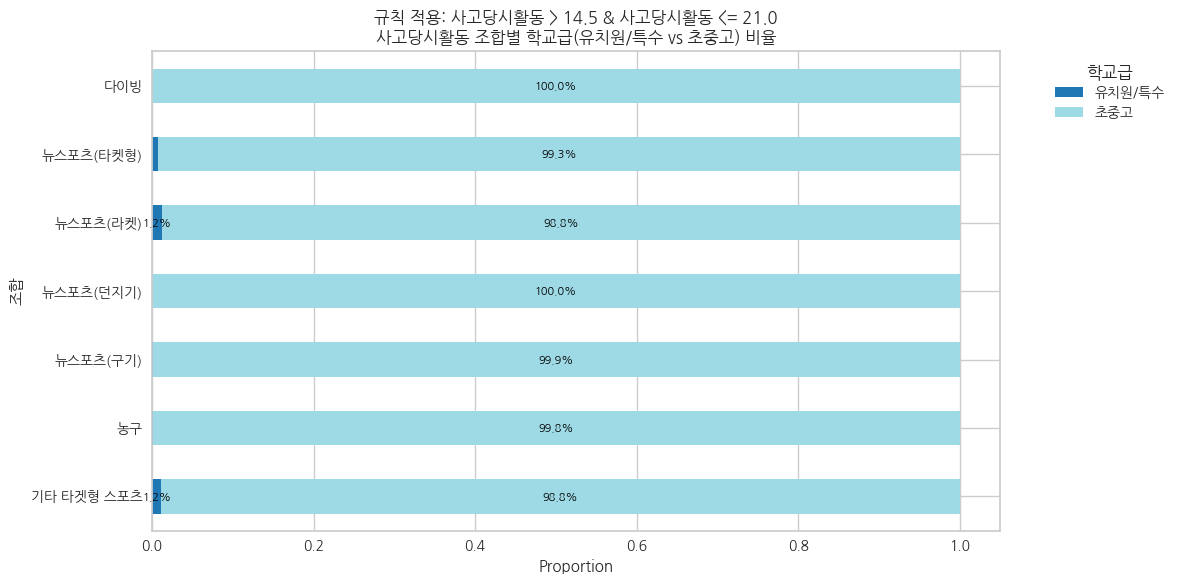


🩶 [Rule 2/3] 사고시간 <= 2.5 & 사고시간 > 0.5


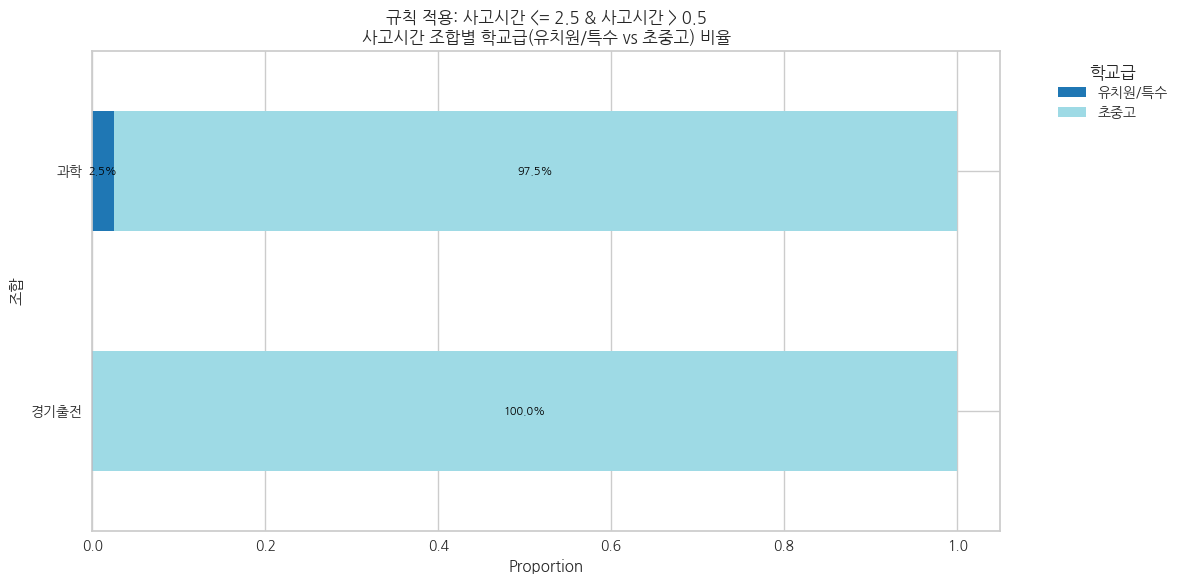


🩶 [Rule 3/3] 사고당시활동 > 27.5 & 사고당시활동 <= 31.5


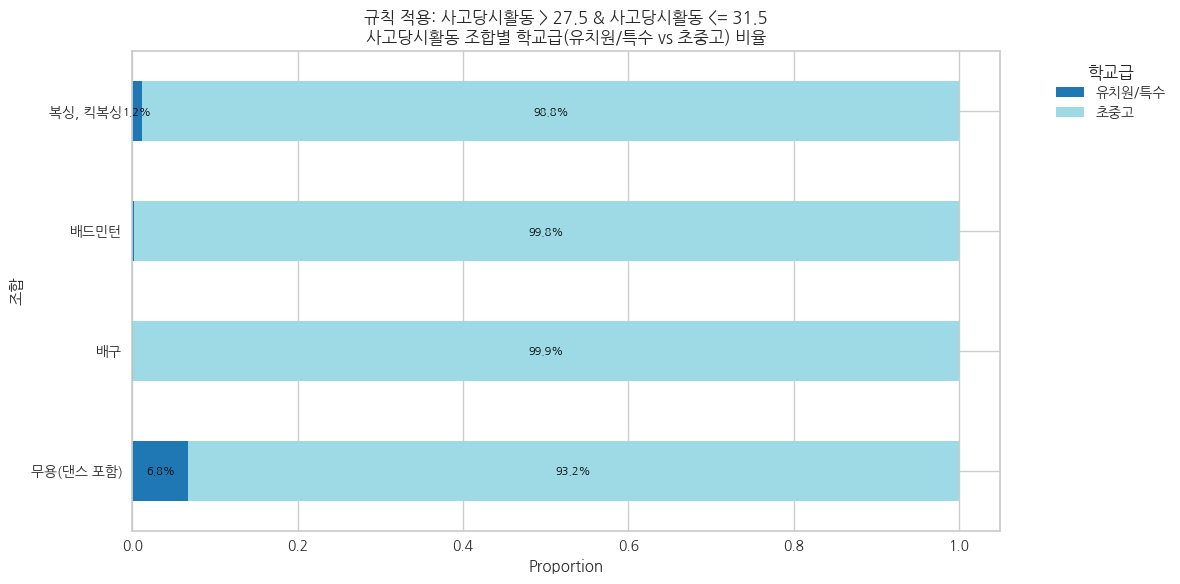

In [147]:
plot_ruleset_combinations_by_label(
    rules_df=top10_coef_positive,
    df=pre,
    label_col='target',
    le_dict=le_dict
)




🩶 [Rule 1/7] 사고시간 <= 21.5 & 사고시간 > 16.5 & 사고시간 > 18.5


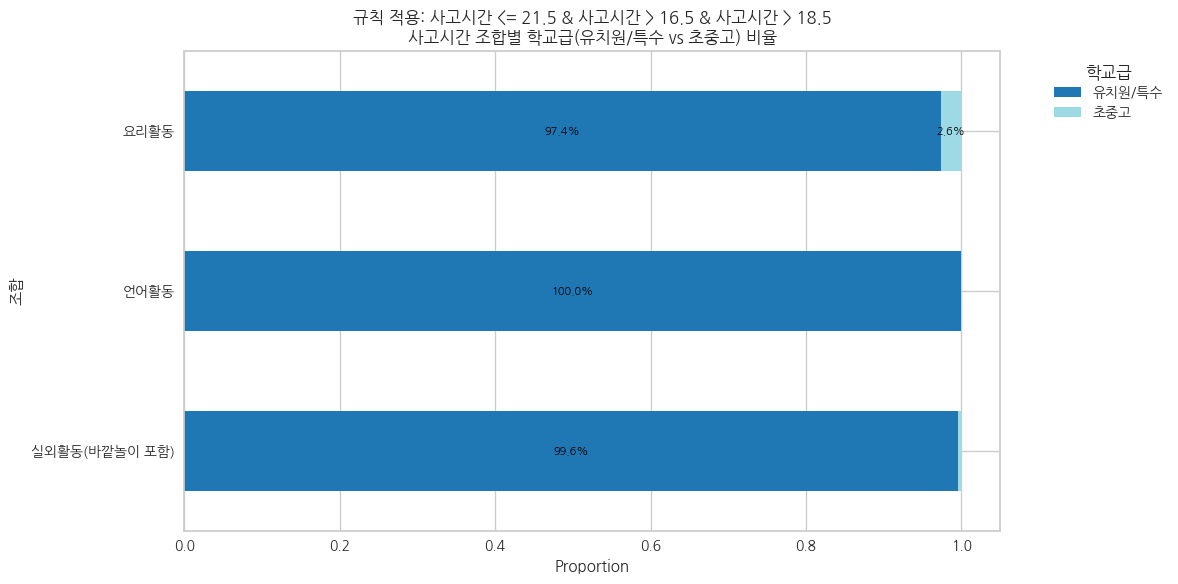


🩶 [Rule 2/7] 사고시간 <= 14.5 & 사고당시활동 <= 51.5 & 사고장소 > 0.5 & 사고시간 > 13.5


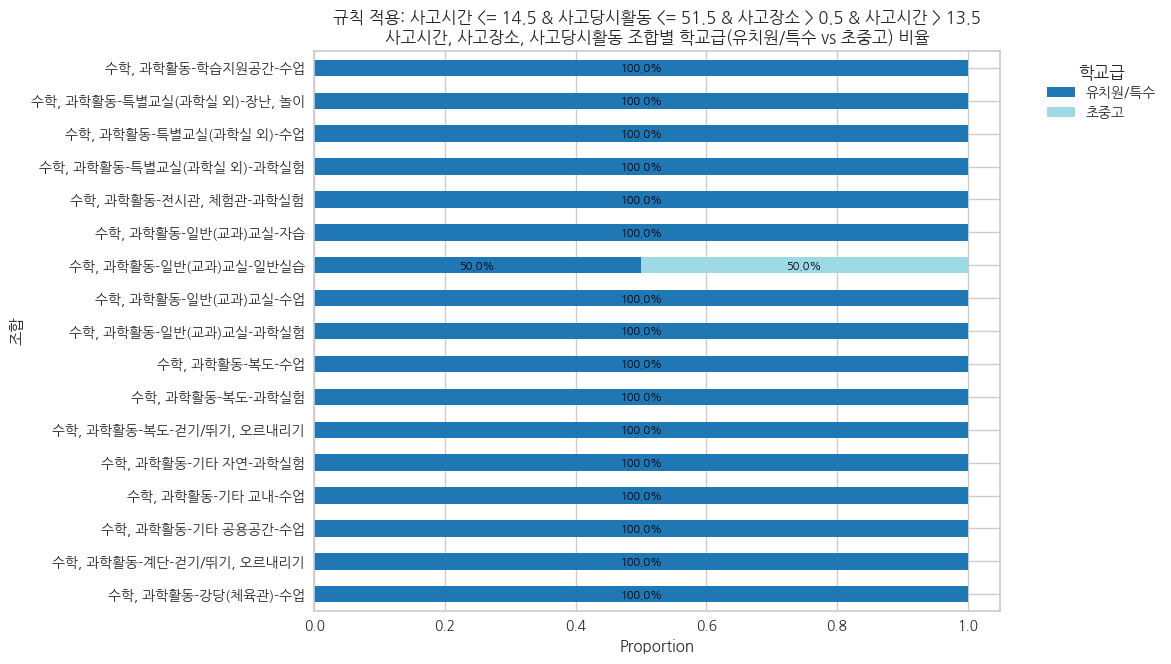


🩶 [Rule 3/7] 사고시간 <= 21.5 & 사고시간 <= 18.5 & 사고시간 > 16.5 & 사고시간 <= 17.5


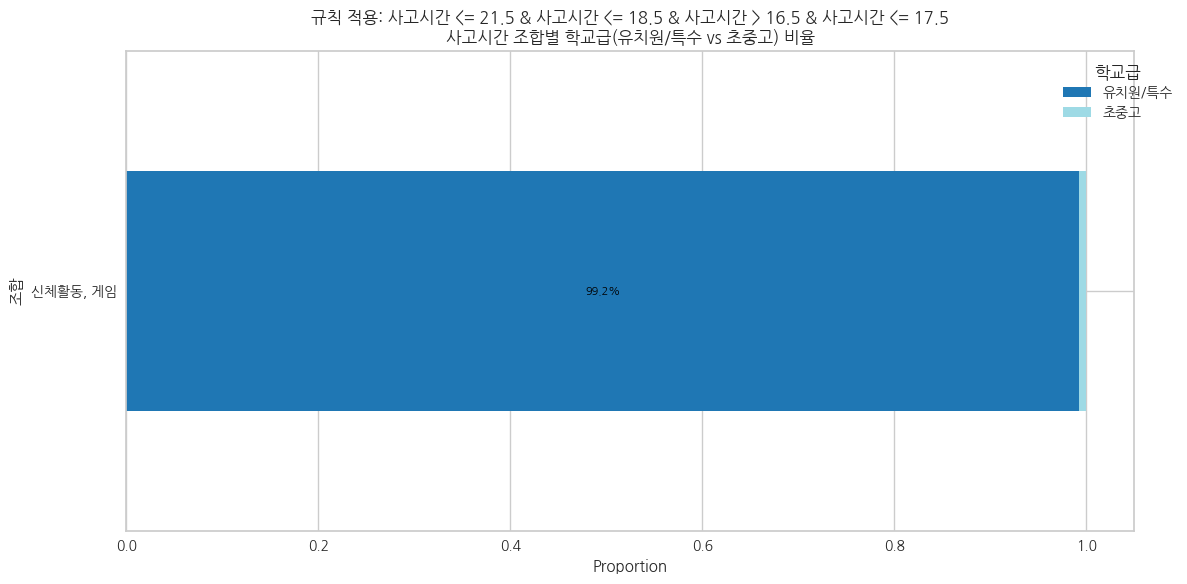


🩶 [Rule 4/7] 사고부위 <= 6.5 & 사고장소 > 36.5 & 사고시간 > 15.5 & 사고당시활동 > 58.5 & 사고부위 <= 3.5 & 사고부위 > 2.5 & 사고부위 <= 27.5 & 사고장소 > 0.5


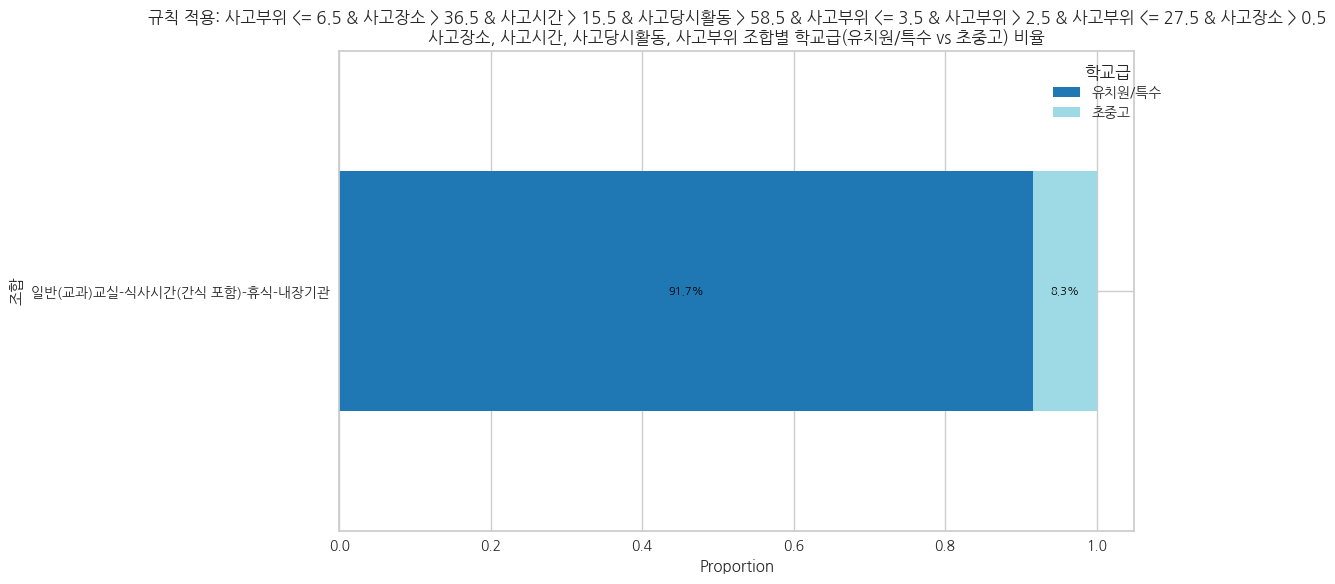


🩶 [Rule 5/7] 사고시간 > 24.5 & 사고시간 <= 25.5


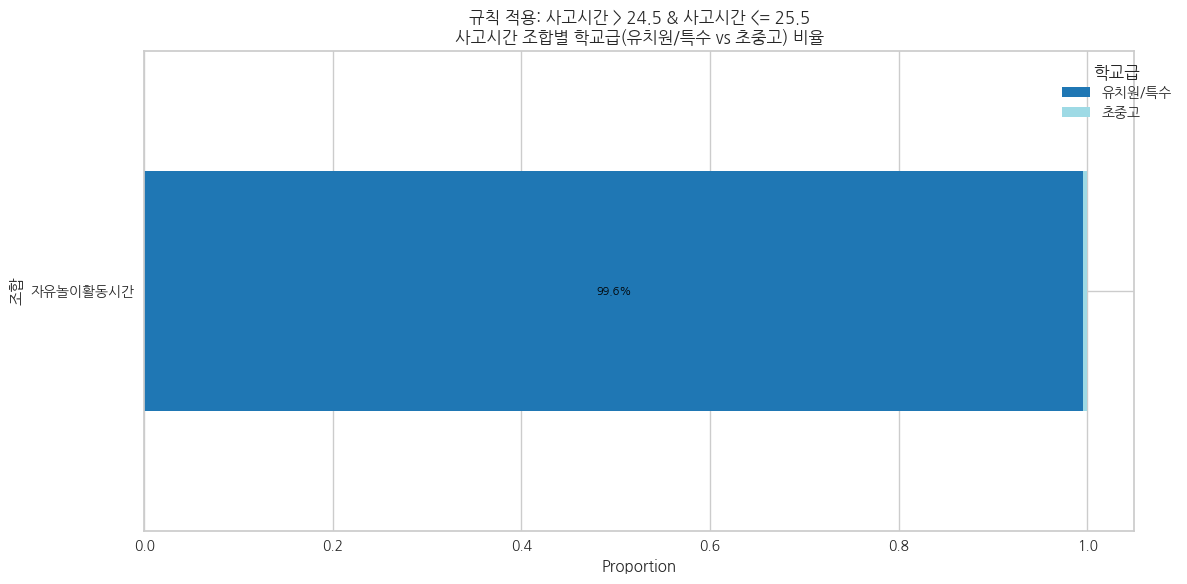


🩶 [Rule 6/7] 사고시간 > 18.5 & 사고당시활동 > 5.5 & 사고당시활동 <= 52.5 & 사고당시활동 <= 49.5 & 사고형태 > 10.5 & 사고시간 <= 22.5


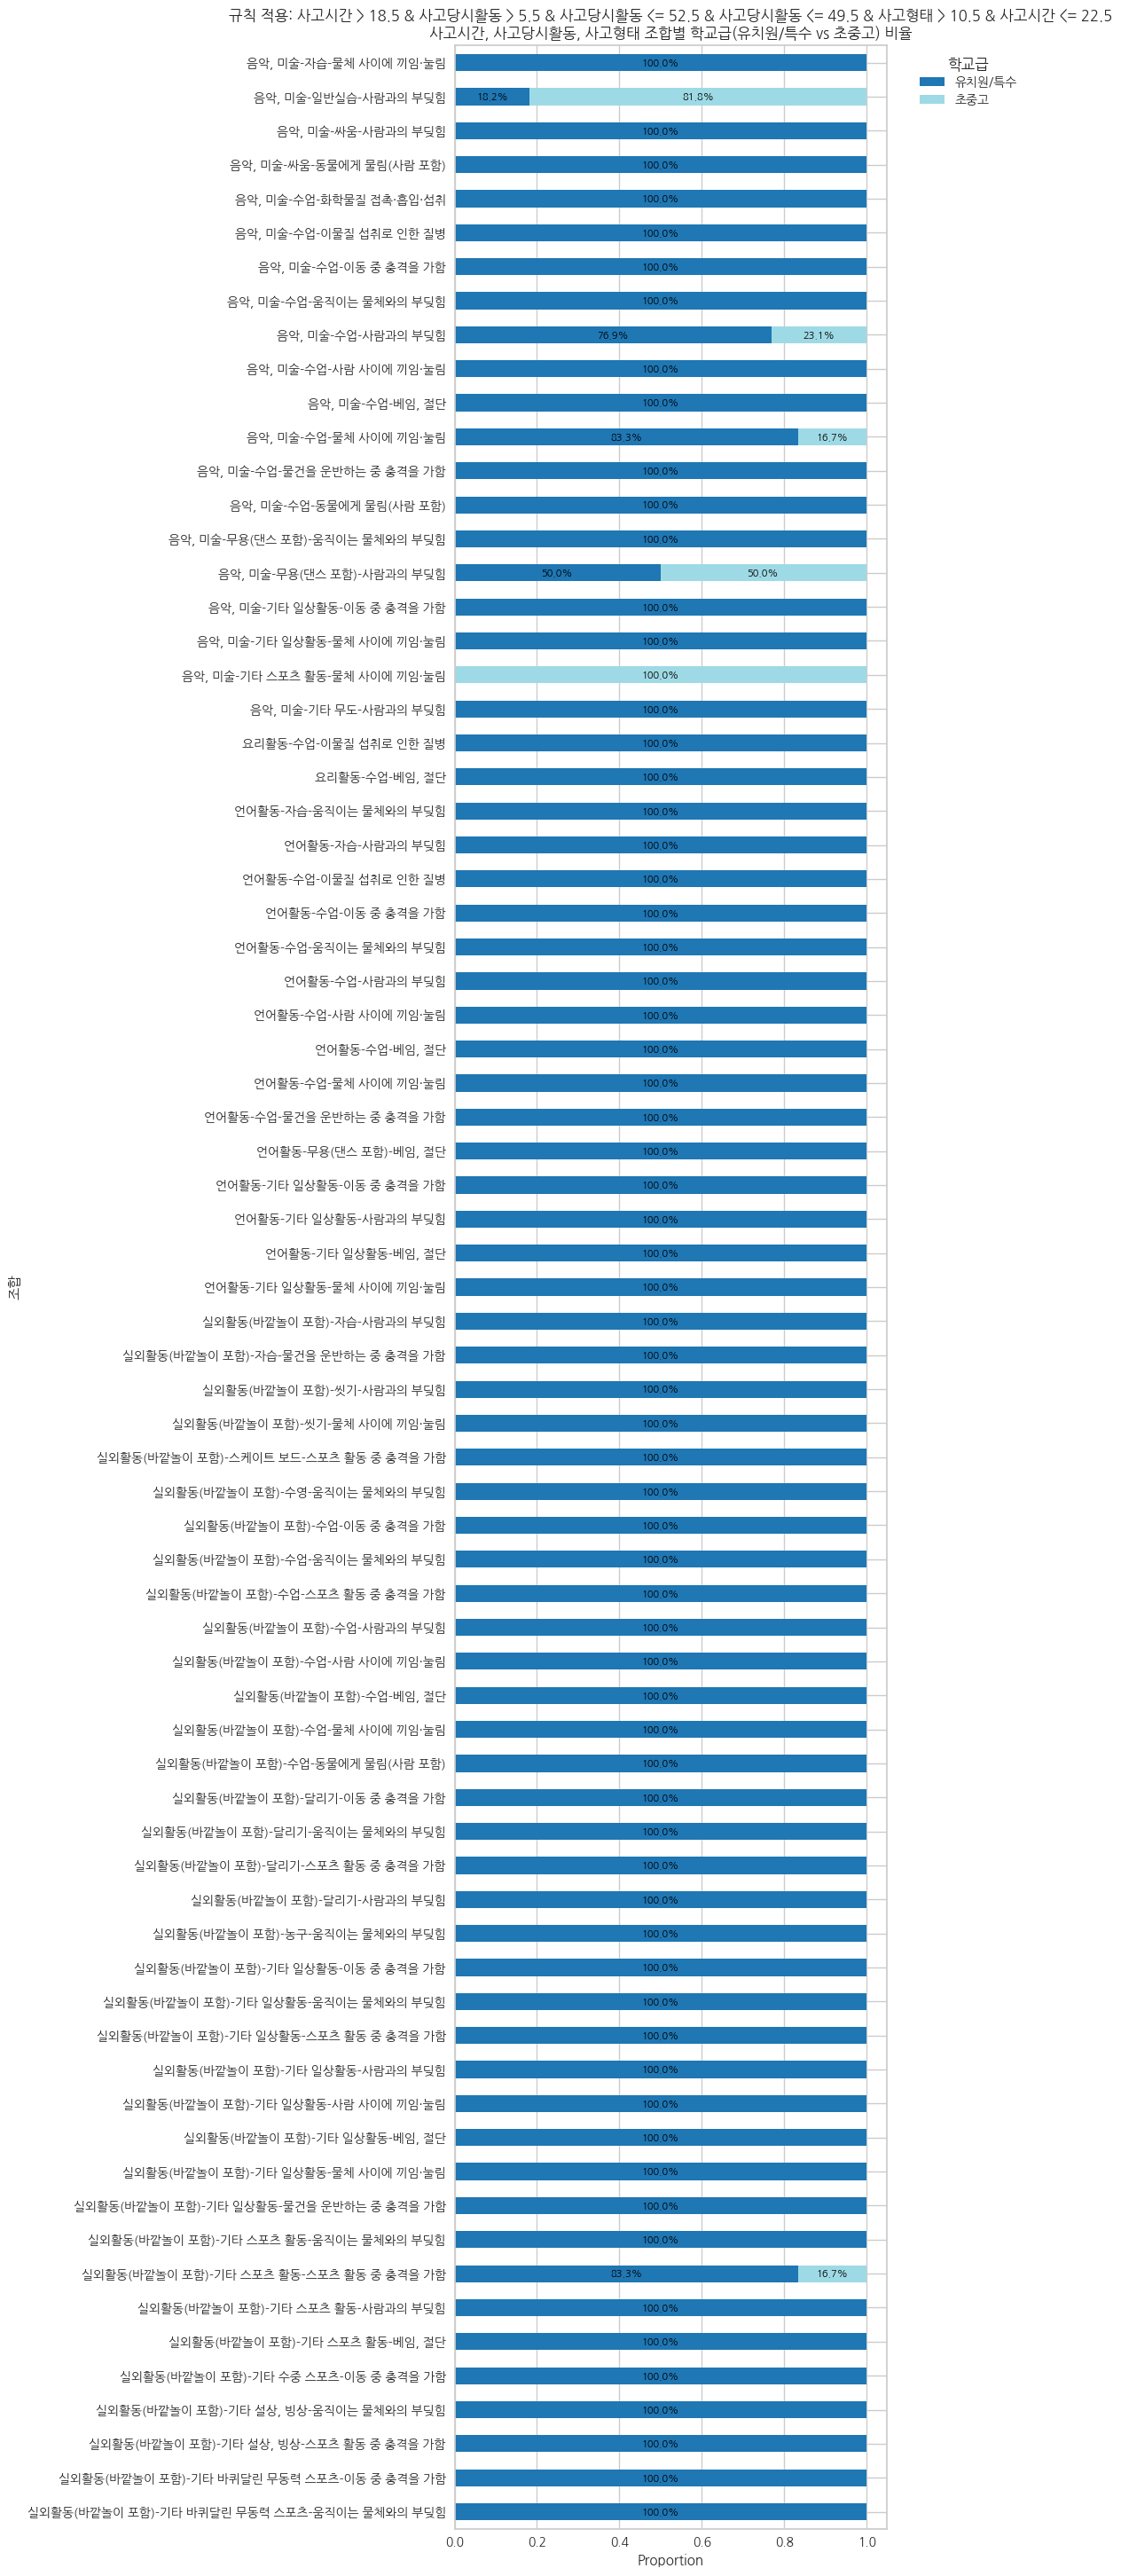


🩶 [Rule 7/7] 사고시간 <= 6.5 & 사고형태 <= 21.5 & 사고시간 > 5.5


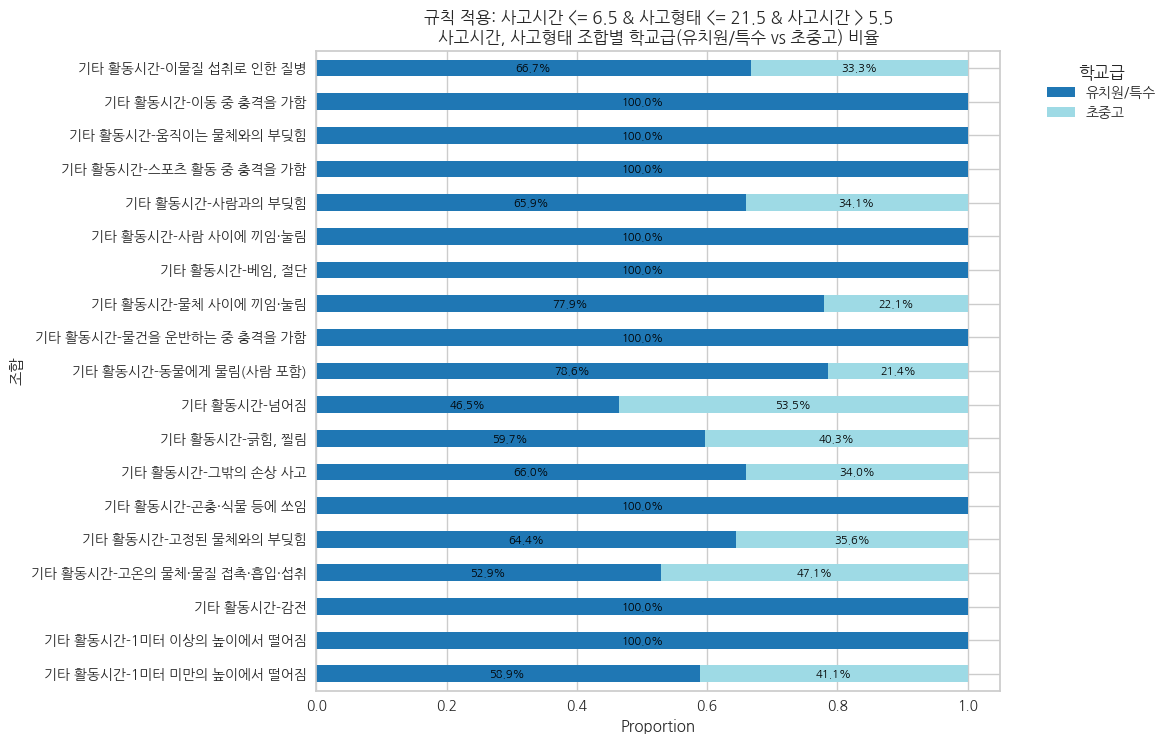

In [148]:
plot_ruleset_combinations_by_label(
    rules_df=top10_coef_negative,
    df=pre,
    label_col='target',
    le_dict=le_dict
)
